In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [3]:
import pandas as pd

df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape


(8807, 12)

The dataset contains 8,807 rows and 12 columns.
Each row represents a movie or TV show available on Netflix.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


The dataset has 8,807 entries and 12 columns.
Most columns are categorical (object type).
Only one numerical column: release_year.
Some columns like director, cast, country, rating, duration, and date_added have missing values.

In [6]:
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Columns director, cast, and country have a significant number of missing values.
Columns date_added, rating, and duration have very few missing entries.
Other columns have no missing values.

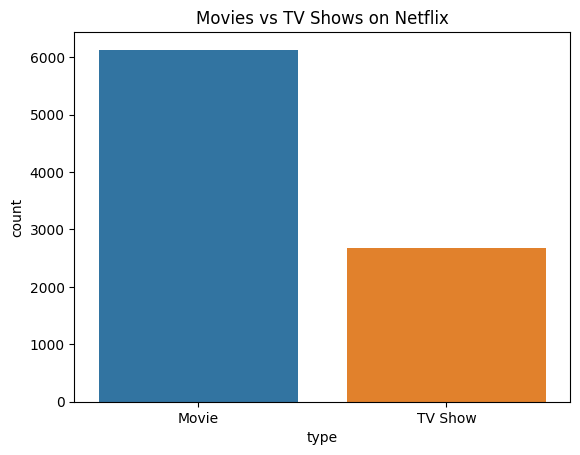

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="type", data=df)
plt.title("Movies vs TV Shows on Netflix")
plt.show()


The number of Movies on Netflix is much higher than TV Shows.
Movies form the majority of the content available on the platform.

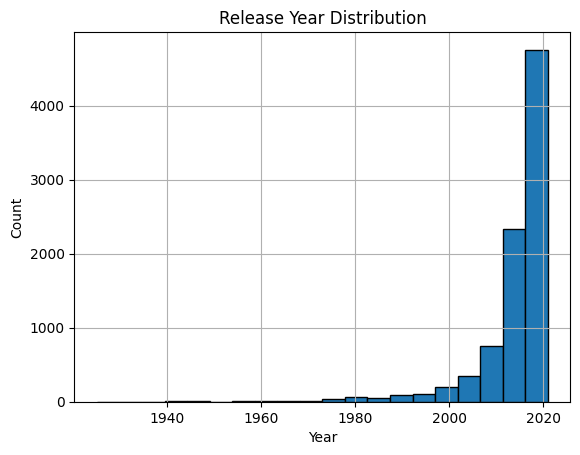

In [9]:
df["release_year"].hist(bins=20, edgecolor="black")
plt.title("Release Year Distribution")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


Most Netflix content was released after the year 2000.
A sharp increase in content is visible after 2010.
Very few titles are from earlier decades.

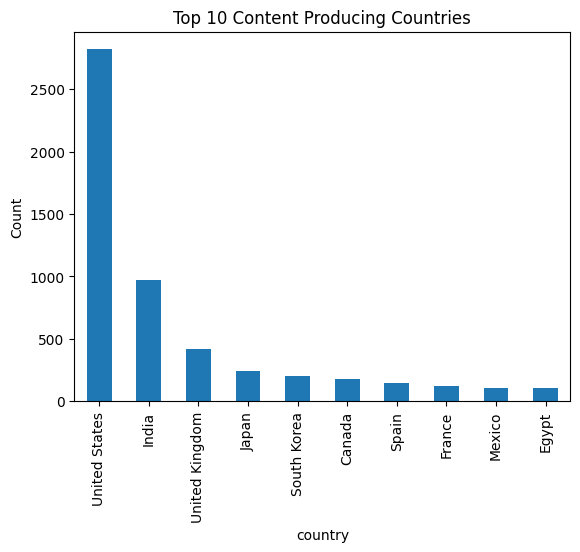

In [10]:
df["country"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Content Producing Countries")
plt.ylabel("Count")
plt.show()


The United States produces the highest number of Netflix titles.
India is the second-largest content producer.
Other major contributors include the United Kingdom, Japan, and South Korea.

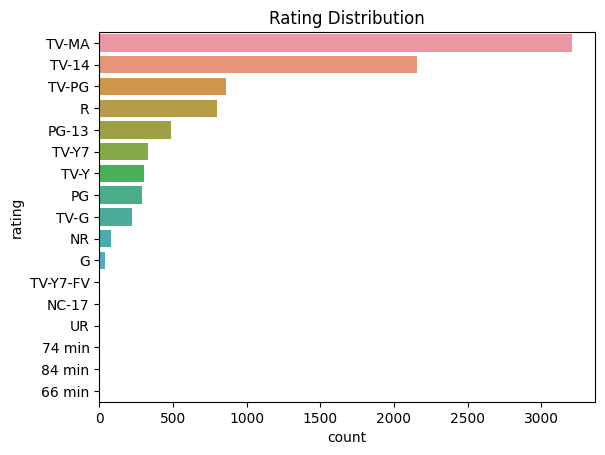

In [11]:
sns.countplot(y="rating", data=df, order=df["rating"].value_counts().index)
plt.title("Rating Distribution")
plt.show()


TV-MA is the most common rating on Netflix.
TV-14 and TV-PG are also widely present.
Very few titles fall under kids-only ratings like G and TV-Y.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


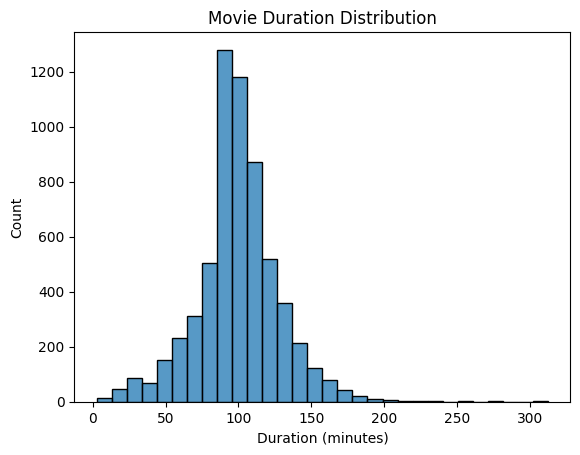

In [13]:
movies = df[df["type"] == "Movie"].copy()

movies["duration_num"] = (
    movies["duration"]
    .str.replace(" min", "", regex=False)
    .astype(float)
)

sns.histplot(movies["duration_num"], bins=30)
plt.title("Movie Duration Distribution")
plt.xlabel("Duration (minutes)")
plt.show()


Most movies are between 80 and 120 minutes long.
The highest concentration is around 90–100 minutes.
Very few movies exceed 200 minutes.

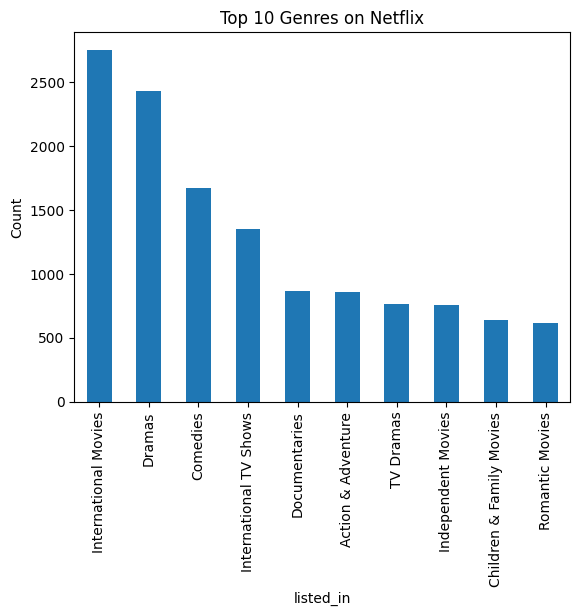

In [14]:
df["listed_in"].str.split(", ").explode().value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Genres on Netflix")
plt.ylabel("Count")
plt.show()


International Movies is the most common genre.
Dramas and Comedies are also highly popular.
Netflix offers a wide variety of genres across different categories.

In [15]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1099,s1100,Movie,The Fisherman's Diary,Enah Johnscott,"Kang Quintus, Faith Fidel, Casson Chinepoh, Ra...",Cameroon,"April 4, 2021",2020,TV-MA,143 min,"Dramas, International Movies",Inspired by Nobel Peace Prize winner Malala Yo...
6355,s6356,Movie,Bombshell: The Hedy Lamarr Story,Alexandra Dean,Hedy Lamarr,United States,"May 31, 2018",2017,TV-14,89 min,Documentaries,An unearthed audio interview of Hollywood icon...
4992,s4993,TV Show,Collateral,NaN,"Carey Mulligan, John Simm, Nicola Walker, Bill...","United Kingdom, United States","March 9, 2018",2018,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Internationa...",Investigating the murder of a pizza delivery m...
7298,s7299,Movie,Life After Beth,Jeff Baena,"Aubrey Plaza, Dane DeHaan, John C. Reilly, Mol...",United States,"July 21, 2018",2014,R,89 min,"Comedies, Horror Movies, Independent Movies","Following the death of his beloved girlfriend,..."
5928,s5929,Movie,Chelsea Handler: Uganda Be Kidding Me Live,James Yukich,Chelsea Handler,United States,"October 10, 2014",2014,TV-MA,71 min,Stand-Up Comedy,"In her first Netflix stand-up comedy special, ..."


Conclusion : 

The Netflix dataset contains a mix of movies and TV shows from multiple countries.

Most content is recent, with a strong focus on releases after 2010.

Netflix offers a wide range of genres, with emphasis on international content.

The platform mainly targets teen and adult audiences.